### Making necessary imports

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Loading and manipulating data

Downloaded two dataframes with pandas: fake and real news 

In [2]:
fake_df = pd.read_csv("NewsData/Fake.csv")

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df = pd.read_csv("NewsData/True.csv")

In [5]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Adding additional column with a label "fake" or "real" before merging two dataframes into one. 

In [6]:
fake_df["flag"] = 0
true_df["flag"] = 1

In [7]:
fake_df.head()

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
true_df.head()

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
fake_df.shape

(23481, 5)

In [10]:
true_df.shape

(21417, 5)

Joining two dataframes into one 

In [12]:
news_df = fake_df.copy()

In [13]:
news_df = news_df.append(true_df)

In [14]:
news_df.head()

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [15]:
news_df.shape

(44898, 5)

In [16]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
title      44898 non-null object
text       44898 non-null object
subject    44898 non-null object
date       44898 non-null object
flag       44898 non-null int64
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


Cleaning from duplicates (test dataframe)

In [17]:
news_df = news_df.drop_duplicates()

In [18]:
news_df.shape

(44689, 5)

In [19]:
news_df = news_df.reset_index(drop=True)

In [20]:
news_df.head()

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [21]:
news_df.tail()

,title,text,subject,date,flag
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44688,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [22]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
title      44689 non-null object
text       44689 non-null object
subject    44689 non-null object
date       44689 non-null object
flag       44689 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


Changing date format datetime

In [23]:
news_df2 = news_df.copy()

In [24]:
news_df.shape

(44689, 5)

In [25]:
news_df2.head()

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [26]:
news_df2.date.unique()

array(['December 31, 2017', 'December 30, 2017', 'December 29, 2017', ...,
       'January 15, 2016 ', 'January 14, 2016 ', 'January 13, 2016 '],
      dtype=object)

In [27]:
news_df2['date'] = pd.to_datetime(news_df2['date'], errors = 'coerce')

In [28]:
news_df2 = news_df2.dropna(axis=0)

In [29]:
news_df2.shape

(44679, 5)

In [30]:
df_todrop = news_df2[news_df2['date'].isnull()]

In [31]:
df_todrop

,title,text,subject,date,flag


In [32]:
df_todrop.shape

(0, 5)

Changing date format datetime as a new column (working with original dataframe)

In [33]:
news_df['datetime'] = news_df['date']

In [34]:
news_df.head()

,title,text,subject,date,flag,datetime
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,"December 25, 2017"


In [35]:
news_df['datetime'] = pd.to_datetime(news_df['datetime'], errors = 'coerce')

In [36]:
news_df.shape

(44689, 6)

In [37]:
news_df = news_df.dropna(axis=0)

In [38]:
news_df.shape

(44679, 6)

In [40]:
news_df.head()

,title,text,subject,date,flag,datetime
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2017-12-25


### Working with non-text data 

In [41]:
news_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [56]:
news_df['year'] = pd.to_datetime(news_df['datetime']).dt.to_period('Y')
news_df['month'] = pd.to_datetime(news_df['datetime']).dt.to_period('M')

news_df['month'] = news_df['month'].astype(str)


In [ ]:
news_df['flag2'] = 

In [122]:
plotting = news_df[['month', 'flag']]
plotting = plotting.groupby(['month', 'flag'])['flag'].count()

In [125]:
plotting

month    flag
2015-03  0          8
2015-04  0        326
2015-05  0        338
2015-06  0        236
2015-07  0        291
2015-08  0        220
2015-09  0        202
2015-10  0        281
2015-11  0        275
2015-12  0        301
2016-01  0       1081
         1        246
2016-02  0       1020
         1        428
2016-03  0       1088
         1        489
2016-04  0        977
         1        383
2016-05  0       1012
         1        394
2016-06  0        871
         1        418
2016-07  0        883
         1        337
2016-08  0        892
         1        265
2016-09  0        936
         1        350
2016-10  0       1082
         1        334
2016-11  0       1004
         1        635
2016-12  0        908
         1        422
2017-01  0       1029
         1        750
2017-02  0        879
         1        589
2017-03  0       1065
         1        679
2017-04  0        805
         1        528
2017-05  0        827
         1        504
2017-06  0        

In [ ]:
pd.DataFrame(df['b'].tolist(), index=df.index)

In [121]:
plotting = pd.DataFrame(plotting[plotting.index].tolist(), index=plotting.index)

KeyError: "None of [Index([('2015-03', 0), ('2015-04', 0), ('2015-05', 0), ('2015-06', 0),\n       ('2015-07', 0), ('2015-08', 0), ('2015-09', 0), ('2015-10', 0),\n       ('2015-11', 0), ('2015-12', 0), ('2016-01', 0), ('2016-01', 1),\n       ('2016-02', 0), ('2016-02', 1), ('2016-03', 0), ('2016-03', 1),\n       ('2016-04', 0), ('2016-04', 1), ('2016-05', 0), ('2016-05', 1),\n       ('2016-06', 0), ('2016-06', 1), ('2016-07', 0), ('2016-07', 1),\n       ('2016-08', 0), ('2016-08', 1), ('2016-09', 0), ('2016-09', 1),\n       ('2016-10', 0), ('2016-10', 1), ('2016-11', 0), ('2016-11', 1),\n       ('2016-12', 0), ('2016-12', 1), ('2017-01', 0), ('2017-01', 1),\n       ('2017-02', 0), ('2017-02', 1), ('2017-03', 0), ('2017-03', 1),\n       ('2017-04', 0), ('2017-04', 1), ('2017-05', 0), ('2017-05', 1),\n       ('2017-06', 0), ('2017-06', 1), ('2017-07', 0), ('2017-07', 1),\n       ('2017-08', 0), ('2017-08', 1), ('2017-09', 0), ('2017-09', 1),\n       ('2017-10', 0), ('2017-10', 1), ('2017-11', 0), ('2017-11', 1),\n       ('2017-12', 0), ('2017-12', 1), ('2018-02', 0)],\n      dtype='object')] are in the [columns]"

In [119]:
plotting

,0,1
"(2015-03, 0)",2015-03,0
"(2015-04, 0)",2015-04,0
"(2015-05, 0)",2015-05,0
"(2015-06, 0)",2015-06,0
"(2015-07, 0)",2015-07,0
"(2015-08, 0)",2015-08,0
"(2015-09, 0)",2015-09,0
"(2015-10, 0)",2015-10,0
"(2015-11, 0)",2015-11,0
"(2015-12, 0)",2015-12,0


In [107]:
plotting.index[0]

('2015-03', 0)

TypeError: ('2015-03', 0) is not a string

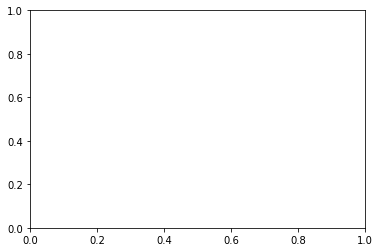

In [99]:
for name, data in plotting.groupby('flag'):
    plt.plot(plotting.index, plotting.values, label=name)

#plt.xlabel('Hour')
#plt.ylabel('Rate')
plt.legend()
plt.show()

In [ ]:
cond = {'a': 100, 'b': 200}
df.loc[(df.a == cond['a']) & (df.b == cond['b']), ['x','y']].plot(title='a: {a}, b: {b}'.format(**cond))

In [ ]:
cond = {'t':1, 'f':0}
plotting.loc[(plotting.t == cond['t'] & plotting.f == cond['f']), ]

TypeError: ('2015-03', 0) is not a string

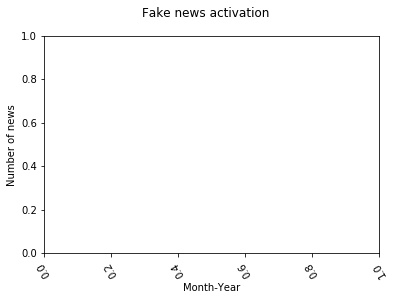

In [97]:
plt.suptitle('Fake news activation')
plt.xticks(rotation=120)
plt.ylabel('Number of news')
plt.xlabel('Month-Year')
plt.plot(plotting.index, plotting.values)

### Splitting the dataset intro training and testing sets 

x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)